In [45]:
"""1) K-means
Link utiles: https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/#:~:text=K-Means%20en%20Python%20paso%20a%20paso&text=K-Means%20es%20un%20algoritmo,clusters)%20entre%20los%20datos%20crudos.
link codigo: https://anderfernandez.com/blog/programar-kmeans-python/"""

'1) K-means\nLink utiles: https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/#:~:text=K-Means%20en%20Python%20paso%20a%20paso&text=K-Means%20es%20un%20algoritmo,clusters)%20entre%20los%20datos%20crudos.\nlink codigo: https://anderfernandez.com/blog/programar-kmeans-python/'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(f"datos/dataClusters/4. data_lunas.csv") #Cargamos los datos del csv data_cumulos.csv
data.head()

,x1,x2
0,0.496271,-0.342753
1,-0.166300,0.922342
2,0.718956,0.665290
3,-0.337840,0.912074
4,0.103768,0.116946


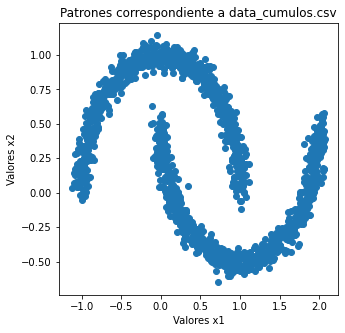

In [48]:
# Trabajamos con numpy.arrays

x1 = data["x1"].values
x2 = data["x2"].values

plt.style.use("fast")

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x1,x2)
ax.set_xlabel("Valores x1")
ax.set_ylabel("Valores x2")
ax.set_title("Patrones correspondiente a data_cumulos.csv")

plt.show()
#Hasta aca lo sque del teorico

In [4]:
def initialize_centroids(k, dato):
    """Genera los centroides"""
    for centroides in range(k):     
        x1 = data["x1"].values
        x2 = data["x2"].values
        puntos= np.array([x1,x2]).T
        listaIndex = [*range(0,puntos.shape[0])]
        index = np.random.choice(listaIndex,k)
        centroides = puntos[index]
        
    centroids = pd.DataFrame(centroides, columns = dato.columns)#2
    #1: tomo dos valores random de las columnas x1 y x2 para asignar centroides
    #2:genero una nueva columna llamada centroids
    return centroids
centroids = initialize_centroids(3, data)
centroids

,x1,x2
0,-0.057567,0.414117
1,1.214816,-0.449014
2,-0.451526,0.867688


In [52]:
def distancia_euclidiana(a,b):
    """Veo la distancia entre los puntos y centroides"""
    error = np.sqrt(np.sum((a-b)**2)) 

    return error

In [8]:
def assign_centroid(data, centroids):
    '''
    Recibe un dataframe de datos y centroides y devuelve una lista con el erro en cada centroide.
    data: los datos en un dataframe, en este caso se utilizan los de x1, x2 y centroid 
    centroids: los centroides
    '''

    n_observations = data.shape[0]#ve cada dato y lo compara
    centroid_assign = []
    centroid_errors = []
    k = centroids.shape[0]#ve cuantos centroides son


    for observation in range(n_observations):

        # ve las distancias de los centroides con los valores de la columnas x1 y x2
        errors = np.array([])
        for centroid in range(k):
            error = np.sqrt(np.sum((centroids.iloc[centroid, :3]-data.iloc[observation,:3])**2))
            errors = np.append(errors, error)

        # calcula con las distancias los centroides mas cercanos 
        closest_centroid =  np.where(errors == np.amin(errors))[0].tolist()[0]
        centroid_error = np.amin(errors)

        centroid_assign.append(closest_centroid)
        centroid_errors.append(centroid_error)

    return (centroid_assign,centroid_errors)

data['centroid'], data['error'] = assign_centroid(data.iloc[:,:3] ,centroids)
data[['centroid', 'error']].head()

,centroid,error
0,1,0.726359
1,2,0.290415
2,0,0.816135
3,2,0.122044
4,0,0.338142


In [58]:
def knn(data, k):
    '''
    con esta funcion hacemos el cluster de datos con los datos y un valor de clusters a crear
    '''

    # inicia los centroides y el error
    centroids = initialize_centroids(k, data)
    error = []
    compr = True
    i = 0

    while(compr):
        # obtiene los centroides y el error
        data['centroid'], iter_error = assign_centroid(data,centroids)
        error.append(sum(iter_error))
        # recalcula
        centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)

        # se fija si el error bajo de 2
        if(len(error)<2):
            compr = True
        else:
            if(round(error[i],3) !=  round(error[i-1],3)): #si el error es diferente 
                compr = True
            else:
                compr= False
        i = i + 1 
        compr+1

    data['centroid'], iter_error = assign_centroid(data,centroids)
    centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)
    return (data['centroid'], iter_error, centroids)

In [57]:
data['centroid'], _, centroids =  knn(data.drop(['centroid','error'], axis = 1),6)
data['centroid'].head()

KeyError: "['centroid' 'error'] not found in axis"

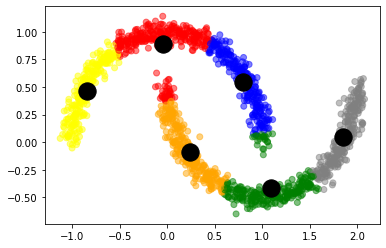

In [ ]:
colors={0:'red', 1:'blue', 2:'green', 3: "orange", 4:"grey", 5:"yellow",6:"purple",7:"pink",8:"olive"}
plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, 
           c = "black")